# Exploratory Data Analysis
This notebook contains all code for the prelimiatory analysis of the KDD Cup 98 datasets

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import os
import numpy as np
import pandas as pd
from scipy import stats

os.chdir("../")
import util.data_loader as dl
from kdd98.transformers import *

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = [20, 16]
plt.rcParams['image.cmap'] = 'viridis'
# seaborn config
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('ticks')
sns.set_palette("viridis")

# figures:
# Where to save the figures
PROJECT_ROOT_DIR = "../../"
CHAPTER_ID = "eda"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the learning dataset


Set working directory to main code folder

In [4]:
%autoreload 2  # automatically reloads modules
data_loader = dl.KDD98DataLoader("cup98LRN.txt")
learning = data_loader.get_dataset()

## Overview

A first, general look at the data structure:

In [5]:
learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Columns: 478 entries, ODATEDW to GEOCODE2
dtypes: category(24), float64(51), int64(302), object(101)
memory usage: 333.4+ MB


### Numerical Features

In [6]:
numerical = learning.select_dtypes(include=np.number).columns
print(numerical)

Index(['AGE', 'NUMCHLD', 'INCOME', 'HIT', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM',
       ...
       'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE',
       'TIMELAG', 'AVGGIFT', 'TARGET_D', 'CLUSTER2'],
      dtype='object', length=353)


### Categorical Features

Categories were defined on import of the csv data. The categories were identified in the dataset dictionary.

In [7]:
categories = learning.select_dtypes(include='category').columns
print(categories)

Index(['TCODE', 'STATE', 'PVASTATE', 'DOMAIN', 'CLUSTER', 'CHILD03', 'CHILD07',
       'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH',
       'WEALTH2', 'GEOCODE', 'LIFESRC', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')


In [8]:
learning.loc[:, categories].describe()

,TCODE,STATE,PVASTATE,DOMAIN,CLUSTER,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,...,WEALTH2,GEOCODE,LIFESRC,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,51589,95412,95412,95412,95412,95412,95412,95412,95412,95280
unique,55,57,3,17,54,4,4,4,4,7,...,10,8,4,1,4,4,5,4,5,5
top,0,CA,,R2,40,,,,,F,...,9,,,L,1,F,X,X,X,A
freq,40917,17343,93954,13623,3979,94266,93846,93601,92565,51277,...,6523,80168,54032,95412,47675,46964,95118,95118,95118,34484


### Object Features

These features have mixed datatypes. This hints at noisy data and features that will have to be transformed before becoming usable.

In [9]:
objects = learning.select_dtypes(include='object').columns
print(objects)

Index(['ODATEDW', 'OSOURCE', 'ZIP', 'MAILCODE', 'DOB', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP',
       ...
       'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22',
       'RDATE_23', 'RDATE_24', 'TARGET_B', 'HPHONE_D'],
      dtype='object', length=101)


In [10]:
learning.loc[:, objects].describe()

,ODATEDW,OSOURCE,ZIP,MAILCODE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,TARGET_B,HPHONE_D
count,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,...,9401,19778,15877,7888,9513,20873,7859,17738,95412,95412
unique,54,896,19938,2,947,3,2,2,2,2,...,11,14,13,10,12,13,17,14,2,2
top,9501,MBC,85351,,0,0,,,,,...,9503,9501,9412,9412,9411,9409,9408,9407,0,1
freq,15358,4539,61,94013,23661,95085,88709,93395,95298,93795,...,4729,10665,12504,4516,5006,11195,4522,7861,90569,47765


### Date features
These are imported as strings and will have to be transformed later on to become useful.

In [11]:
dates = learning.loc[:, dl.date_features]
dates.describe()

,ODATEDW,DOB,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,...,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24
count,95412,95412,95412,93462,93221,61822,91855,86538,91901,84167,...,7262,26994,9401,19778,15877,7888,9513,20873,7859,17738
unique,54,947,2,2,8,1,2,3,5,3,...,16,18,11,14,13,10,12,13,17,14
top,9501,0,9706,9606,9604,9604,9603,9602,9601,9511,...,9505,9504,9503,9501,9412,9412,9411,9409,9408,9407
freq,15358,23661,95399,93444,92405,61822,91804,81512,85468,80718,...,4862,16670,4729,10665,12504,4516,5006,11195,4522,7861


## Cleaning

We will leverage scikit's transformer classes, and add our own transformers. This might on first glance look as a tedious way to clean data. However, it will be very powerful later on. The transformer's parameters are actually hyperparameters in model selection. This means that a grid-search can be employed to evaluate several different strategies for i.e. imputation of missing values, cutoff thresholds for sparse features and so on and find the best preprocessing steps.

sklearn doc:

* http://scikit-learn.org/dev/modules/generated/sklearn.compose.ColumnTransformer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
* http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
#from category_encoders.hashing import HashingEncoder

### Boolean features

In [13]:
print(dl.boolean_features)

['MAILCODE', 'NOEXCH', 'RECSWEEP', 'RECINHSE', 'RECP3', 'RECPGVG', 'AGEFLAG', 'HOMEOWNR', 'MAJOR', 'COLLECT1', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL', 'TARGET_B', 'HPHONE_D', 'VETERANS']


In [14]:
%autoreload 2
bool_transformers = ColumnTransformer([
    ("bool_x_bl",
     BooleanFeatureRecode(value_map={'true': 'X', 'false': ' '}),
     ['PEPSTRFL', 'NOEXCH', 'MAJOR', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP']
     ),
    ("bool_y_n",
     BooleanFeatureRecode(value_map={'true': 'Y', 'false': 'N'}),
     ['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
      'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN',  'BOATS', 'WALKER', 'KIDSTUFF',
      'CARDS', 'PLATES']
     ),
    ("bool_e_i",
     BooleanFeatureRecode(value_map={'true': "E", 'false': 'I'}),
     ['AGEFLAG']
     ),
    ("bool_h_u",
     BooleanFeatureRecode(value_map={'true': "H", 'false': 'U'}),
     ['HOMEOWNR']),
    ("bool_b_bl",
     BooleanFeatureRecode(value_map={'true': 'B', 'false': ' '}),
     ['MAILCODE']
     ),
    ("bool_1_0",
     BooleanFeatureRecode(value_map={'true': '1', 'false': '0'}),
     ['HPHONE_D', 'TARGET_B']
     )
])

In [15]:
booleans = bool_transformers.fit_transform(learning)

In [16]:
feature_names = [n[n.find('__')+2:]
                 for n in bool_transformers.get_feature_names()]

In [17]:
bools = pd.DataFrame(data=booleans, columns=feature_names,
                     index=learning.index)

In [18]:
learning[dl.boolean_features] = bools

### Zipcode

In [19]:
zip_transformer = ColumnTransformer([
    ("truncate_zip",
     ZipCodeFormatter(),
     ['ZIP']
     )
])

In [20]:
zip = zip_transformer.fit_transform(learning)

Just a quick sanity check

In [21]:
learning.ZIP.head()

CONTROLN
95515     61081
148535    91326
15078     27017
172556    95953
7112      33176
Name: ZIP, dtype: object

In [22]:
zip[0:5]

array([[61081],
       [91326],
       [27017],
       [95953],
       [33176]])

Replace the zip coode feature

In [23]:
learning.ZIP = zip
learning.ZIP = learning.ZIP.astype("int", copy=False)

### Categories


Some categories are already created on import of the data. Additionally, we will have to treat some special cases:

* Multibyte features. These are features that group together several related nominal features. These are mainly the promotion history codes. Recency, Frequency and Amount as of a particular mailing are glued together in one feature. For RFA_2 and additionally MDMAUD, the major donor matrix, the features were already spread out by the supplier of the data. These two were dropped on import of the CSV file and their spread out features kept.

* OSOURCE: It identifies the origin of the data for a particular record. However, it has so many levels that the feature space would get inflated heavily by one-hot encoding. For this feature, hasing is employed.

* TCODE Special treatment will also be necessary for the TCODE feature. It describes the title code (Ms., Hon., and so on) in an unfortunate integer coding ranging from 1e0 to 1e4. For EDA, this will be ignored.

The following are already coded as categories in the imported dataset:

In [24]:
learning.select_dtypes(include="category").columns

Index(['TCODE', 'STATE', 'PVASTATE', 'DOMAIN', 'CLUSTER', 'CHILD03', 'CHILD07',
       'CHILD12', 'CHILD18', 'GENDER', 'WEALTH1', 'DATASRCE', 'SOLP3', 'SOLIH',
       'WEALTH2', 'GEOCODE', 'LIFESRC', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

Treating multibyte features and OSOURCE:

In [25]:
print(dl.nominal_features)

['OSOURCE', 'RFA_3', 'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

In [26]:
import category_encoders as ce

In [27]:
hash_transformer = ColumnTransformer([
    ("hash",
     HashingEncoder(),
     ['OSOURCE']
    )
])

multibyte_transformer = ColumnTransformer([
    ("rfa_spread",
     MultiByteExtract(["R", "F", "A"]),
     dl.nominal_features[2:]
    )
])

Apply the transormation to all RFA_* features and the OSOURCE feature and extract the new feature names to build a pandas dataframe:

In [28]:
multibytes = multibyte_transformer.fit_transform(learning)
feature_names_m = [n[n.find('__')+2:]
                 for n in multibyte_transformer.get_feature_names()]

In [29]:
hashes = hash_transformer.fit_transform(learning)
feature_names_h = [n[n.find('__')+2:]
                 for n in hash_transformer.get_feature_names()]

None
Index(['OSOURCE'], dtype='object')


Merge learning and the new nominal features, then drop the originals

In [30]:
multibytes = pd.DataFrame(data=multibytes, columns=feature_names_m,
                   index=learning.index).astype("category")
learning = learning.merge(multibytes, on=learning.index.name, copy=False)

hashes = pd.DataFrame(data=hashes, columns=feature_names_h,
                   index=learning.index)
learning = learning.merge(hashes, on=learning.index.name, copy=False)

learning = learning.drop(dl.nominal_features, axis=1)

### Dates

There are several date features. ODATEDW is the date the record was added, DOB the birth date. ADATE_* and RDATE_* are from the promotion history. ADATE_* is the date of a mailing, RDATE_* the date the donation for the corresponding mailing was received. While these dates are not of particular interest (very low variance), the time it took to respond might be.

Two different transformations are applied:

1. ODATEDW, DOB: Get transformed to years before 1997 -> membership duration, age
2. For the promotion history, as specified above, the time for response in months

In [31]:
print(dl.date_features)

['ODATEDW', 'DOB', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24']


First, parse all date features into datetime values. This also takes care of dates that by the default pivot fall into the 21st century by subtracting 100 years for these.
Invalid dates (shorter than 3 digits, 3 digits are fixed as usually the format is yym) are set to NaT

In [32]:
date_transformer = ColumnTransformer([
    ("parse_dates",
     ParseDates(treat_errors='ignore'),
     dl.date_features
     )
])

In [33]:
dates = date_transformer.fit_transform(learning)

In [34]:
feature_names = [n[n.find('__')+2:]
                 for n in date_transformer.get_feature_names()]
print(feature_names) 

['ODATEDW', 'DOB', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24']


In [35]:
dates = pd.DataFrame(dates, columns=list(
    dl.date_features), index=learning.index)


In [36]:
learning[dl.date_features] = dates

Now, we transform the dates from the giving history. First, we create two dataframes with the sending dates of the mailings and the dates when the gift (donation) for these was received.

In [37]:
don_hist_transformer = ColumnTransformer([
    ("months_to_donation",
     MonthsToDonation(),
     dl.don_hist_dates
     )
])

In [38]:
donation_responses = don_hist_transformer.fit_transform(learning)

In [39]:
feature_names = [n[n.find('__')+2:]
                 for n in don_hist_transformer.get_feature_names()]

In [40]:
donation_responses = pd.DataFrame(
    donation_responses, index=learning.index, columns=feature_names)

In [41]:
learning = learning.merge(donation_responses, on=learning.index.name)
learning.drop(dl.don_hist_dates, axis=1, inplace=True)

Finally, we compute the membership years and age of the records

In [42]:
age_transformer = ColumnTransformer([
    ("relative_age",
     ComputeAge(),
    ['ODATEDW', 'DOB'])
])

In [43]:
rel_ages = age_transformer.fit_transform(learning)

In [44]:
feature_names = [n[n.find('__')+2:]
                 for n in age_transformer.get_feature_names()]

In [45]:
rel_ages =pd.DataFrame(rel_ages, index=learning.index,columns=feature_names)

In [46]:
learning[['ODATEDW', 'DOB']] = rel_ages

In [47]:
learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Columns: 504 entries, ODATEDW to MONTHS_TO_DONATION_24
dtypes: bool(30), category(87), datetime64[ns](1), float64(75), int32(1), int64(310)
memory usage: 292.8 MB


## Actual EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208490E5DA0>,
      dtype=object)

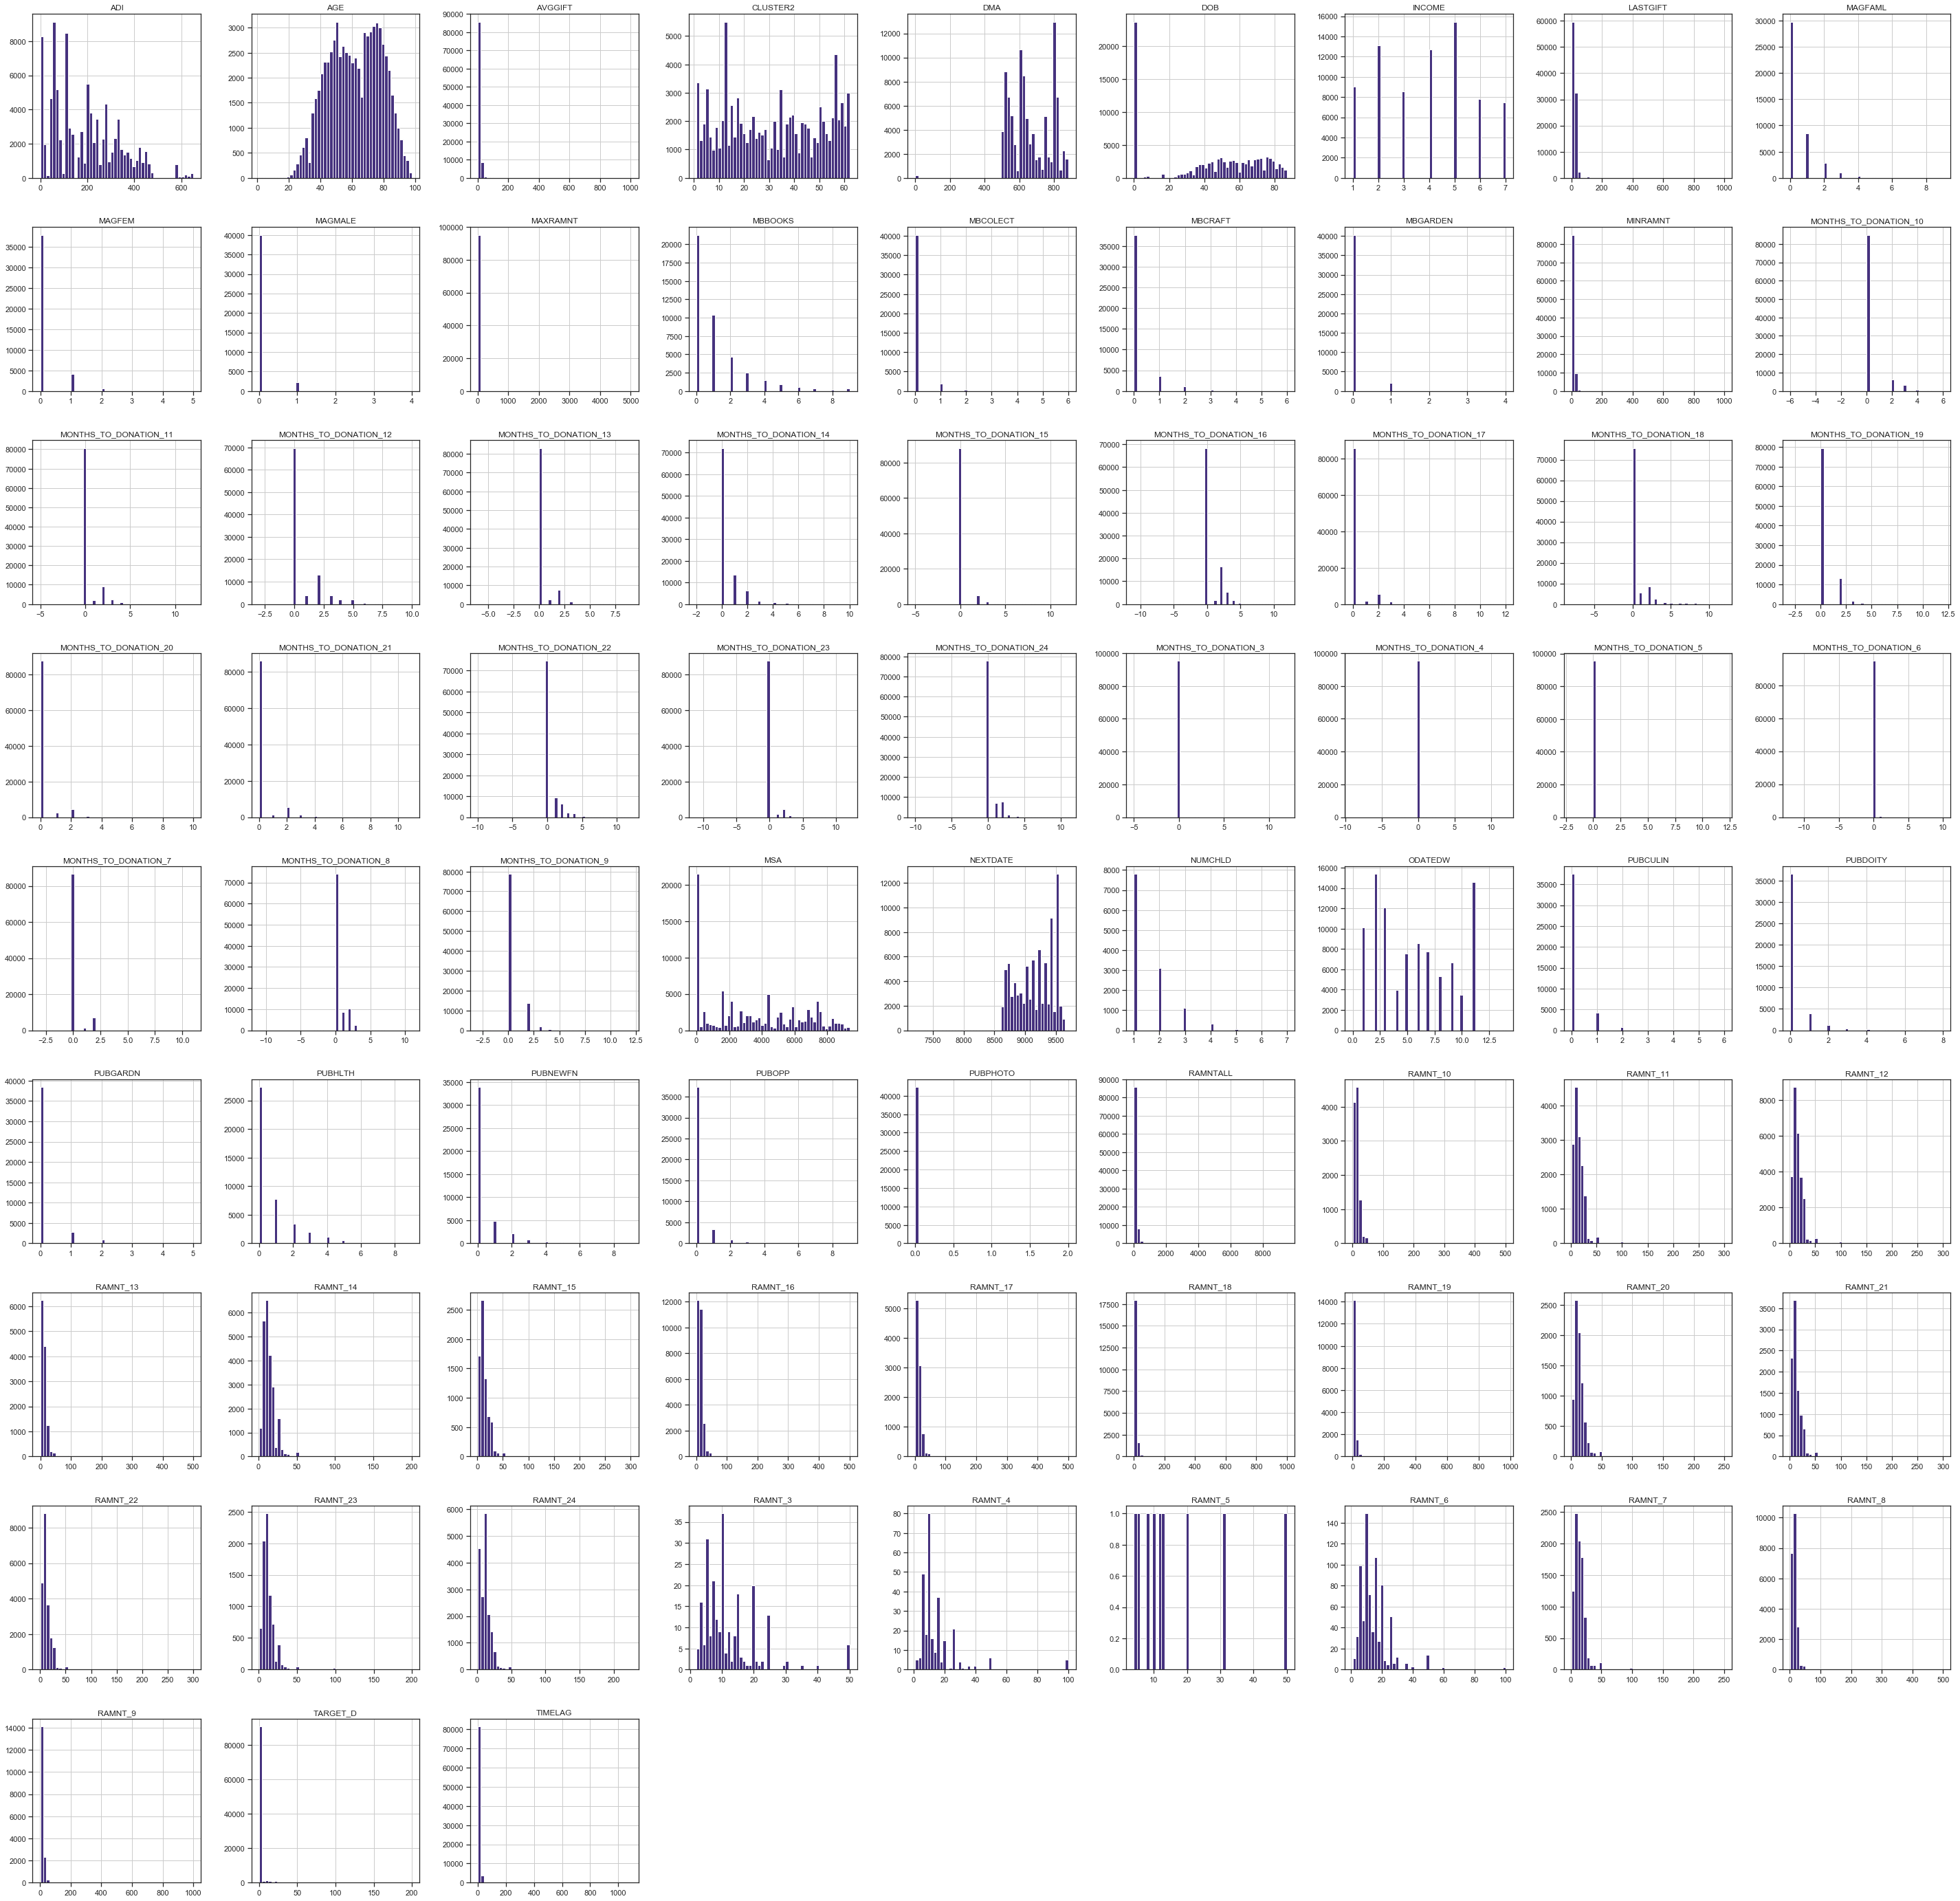

Saving figure float_feature_histograms


<Figure size 432x288 with 0 Axes>

In [48]:
learning.select_dtypes(include=np.float).hist(bins=50, figsize=(50, 50))
plt.show()
save_fig("float_feature_histograms")

### The US census data

In [49]:
census = learning[dl.us_census_features]
census_corr = census.corr()

Saving figure correlation_census


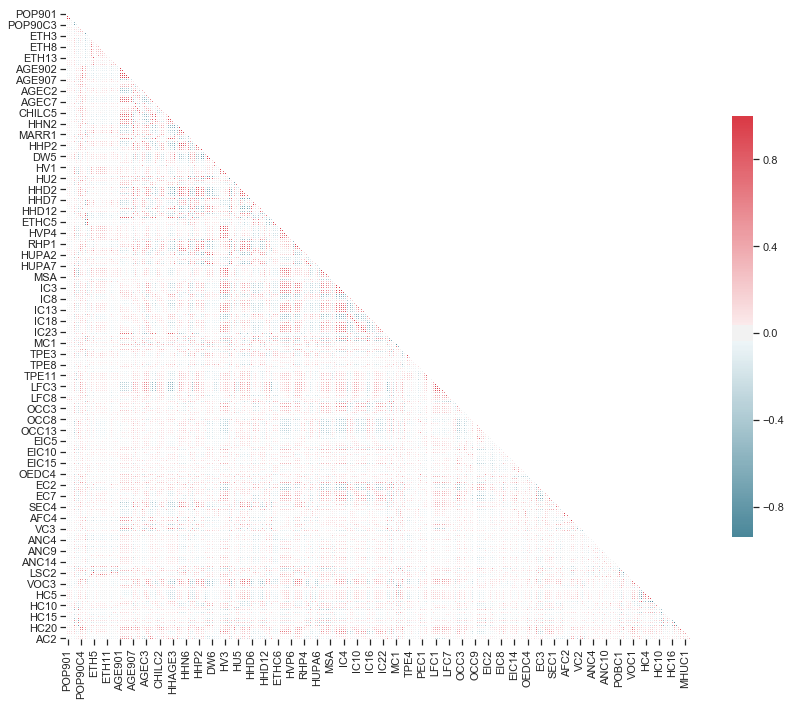

In [50]:
mask = np.zeros_like(census_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(census_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
save_fig(fig_id="correlation_census")

In [51]:
census.select_dtypes(include="int64")

,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,...,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,992,264,332,0,35,65,47,53,92,1,...,0,33,65,40,99,99,6,2,10,7
148535,3611,940,998,99,0,0,50,50,67,0,...,0,99,0,99,99,99,20,4,6,5
15078,7001,2040,2669,0,2,98,49,51,96,2,...,15,22,77,17,97,92,9,2,6,5
172556,640,160,219,0,8,92,54,46,61,0,...,16,23,77,22,93,89,16,2,6,6
7112,2520,627,761,99,0,0,46,54,2,98,...,0,99,1,21,99,96,6,2,7,11
47784,18172,5112,6618,81,0,19,49,51,93,6,...,6,97,3,60,99,97,9,3,6,4
62117,1067,245,348,0,99,0,46,54,99,0,...,0,99,0,97,99,94,5,2,3,4
109359,1485,424,512,99,0,0,51,49,96,2,...,0,99,0,19,99,98,7,2,9,4
75768,2268,622,884,0,0,99,49,51,99,0,...,5,62,37,57,99,97,9,2,5,7


### Some promising fetures and their impact on the label

### Income, Wealth and donations

C:\Users\micro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


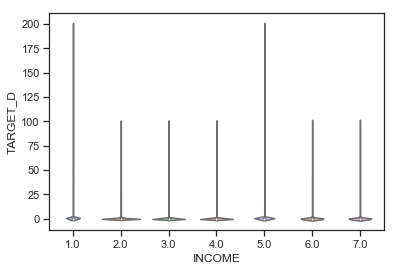

In [52]:
sns.violinplot(x="INCOME", y="TARGET_D", palette="pastel", data=learning)

C:\Users\micro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


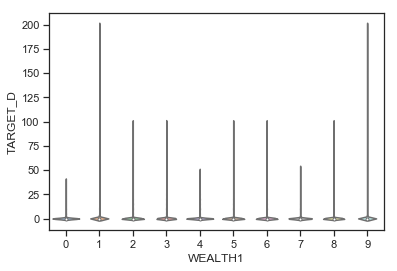

In [53]:
sns.violinplot(x="WEALTH1", y="TARGET_D", palette="pastel", data=learning)

In [ ]:
sns.catplot(x="WEALTH2", y="TARGET_D", hue="MAJOR",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=learning)

In [ ]:
sns.catplot(x="CLUSTER", y="TARGET_D", kind="box", data=learning)

In [ ]:
sns.distplot(learning.loc[learning.TARGET_D > 0.0,
                          'TARGET_D'], bins=50, kde=False, rug=True)

### Giving history correlations

### Correlations

-> Product moment covariance

### Target variable (labels)

### US census data

In [ ]:
us_census = ["POP901", "POP902", "POP903", "POP90C1", "POP90C2", "POP90C3", "POP90C4", "POP90C5", "ETH1", "ETH2", "ETH3", "ETH4", "ETH5", "ETH6", "ETH7", "ETH8", "ETH9", "ETH10", "ETH11", "ETH12", "ETH13", "ETH14", "ETH15", "ETH16", "AGE901", "AGE902", "AGE903", "AGE904", "AGE905", "AGE906", "AGE907", "CHIL1", "CHIL2", "CHIL3", "AGEC1", "AGEC2", "AGEC3", "AGEC4", "AGEC5", "AGEC6", "AGEC7", "CHILC1", "CHILC2", "CHILC3", "CHILC4", "CHILC5", "HHAGE1", "HHAGE2", "HHAGE3", "HHN1", "HHN2", "HHN3", "HHN4", "HHN5", "HHN6", "MARR1", "MARR2", "MARR3", "MARR4", "HHP1", "HHP2", "DW1", "DW2", "DW3", "DW4", "DW5", "DW6", "DW7", "DW8", "DW9", "HV1", "HV2", "HV3", "HV4", "HU1", "HU2", "HU3", "HU4", "HU5", "HHD1", "HHD2", "HHD3", "HHD4", "HHD5", "HHD6", "HHD7", "HHD8", "HHD9", "HHD10", "HHD11", "HHD12", "ETHC1", "ETHC2", "ETHC3", "ETHC4", "ETHC5", "ETHC6", "HVP1", "HVP2", "HVP3", "HVP4", "HVP5", "HVP6", "HUR1", "HUR2", "RHP1", "RHP2", "RHP3", "RHP4", "HUPA1", "HUPA2", "HUPA3", "HUPA4", "HUPA5", "HUPA6", "HUPA7", "RP1", "RP2", "RP3", "RP4", "MSA", "ADI", "DMA", "IC1", "IC2", "IC3", "IC4", "IC5", "IC6", "IC7", "IC8", "IC9", "IC10", "IC11", "IC12", "IC13", "IC14", "IC15", "IC16", "IC17",
             "IC18", "IC19", "IC20", "IC21", "IC22", "IC23", "HHAS1", "HHAS2", "HHAS3", "HHAS4", "MC1", "MC2", "MC3", "TPE1", "TPE2", "TPE3", "TPE4", "TPE5", "TPE6", "TPE7", "TPE8", "TPE9", "PEC1", "PEC2", "TPE10", "TPE11", "TPE12", "TPE13", "LFC1", "LFC2", "LFC3", "LFC4", "LFC5", "LFC6", "LFC7", "LFC8", "LFC9", "LFC10", "OCC1", "OCC2", "OCC3", "OCC4", "OCC5", "OCC6", "OCC7", "OCC8", "OCC9", "OCC10", "OCC11", "OCC12", "OCC13", "EIC1", "EIC2", "EIC3", "EIC4", "EIC5", "EIC6", "EIC7", "EIC8", "EIC9", "EIC10", "EIC11", "EIC12", "EIC13", "EIC14", "EIC15", "EIC16", "OEDC1", "OEDC2", "OEDC3", "OEDC4", "OEDC5", "OEDC6", "OEDC7", "EC1", "EC2", "EC3", "EC4", "EC5", "EC6", "EC7", "EC8", "SEC1", "SEC2", "SEC3", "SEC4", "SEC5", "AFC1", "AFC2", "AFC3", "AFC4", "AFC5", "AFC6", "VC1", "VC2", "VC3", "VC4", "ANC1", "ANC2", "ANC3", "ANC4", "ANC5", "ANC6", "ANC7", "ANC8", "ANC9", "ANC10", "ANC11", "ANC12", "ANC13", "ANC14", "ANC15", "POBC1", "POBC2", "LSC1", "LSC2", "LSC3", "LSC4", "VOC1", "VOC2", "VOC3", "HC1", "HC2", "HC3", "HC4", "HC5", "HC6", "HC7", "HC8", "HC9", "HC10", "HC11", "HC12", "HC13", "HC14", "HC15", "HC16", "HC17", "HC18", "HC19", "HC20", "HC21", "MHUC1", "MHUC2", "AC1", "AC2"]
len(us_census)

# PCA

A first look at important features

In [ ]:
from sklearn import decomposition
from kdd98.transformers import *

In [ ]:
X = learning.drop(["TARGET_B", "TARGET_D","ADATE_2", "TCODE"], axis=1)
X.info()

In [ ]:
X.select_dtypes(include="category").columns

In [ ]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot",  OneHotEncoder(impute_missing=True,use_cat_names=True,return_df=True))
])

categories_transformer = ColumnTransformer([
    ("cat_encoder",
     cat_pipe,
     list(learning.select_dtypes(include="category").columns))
])

In [ ]:
cats = categories_transformer.fit_transform(X)

In [ ]:
print(list(categories_transformer.named_transformers_.cat_encoder.named_steps.one_hot.get_feature_names()))

In [ ]:
cats

In [ ]:
pca = decomposition.PCA()
pca.fit(X)
result = pd.DataFrame(pca.transform(X), columns=[
                      "PCA%i" % i for i in range(n_comp)], index=X.index)